# NFL Big Data Bowl

This project contains the analysis of the aspects that make a run play successful, and a model that can predict the yards that will be gained on the next run play. All of the data used can be found [here](https://www.kaggle.com/c/nfl-big-data-bowl-2020/overview) <br> <br>
#### The aims:
1. *To utilise statistical analysis in order to provide a better understanding of what contributes to a successful run play.*
2. *To build a model that will predict the yards gained by the next run play.*

#### Why this matters:
1. *NFL teams are franchises, and winning teams can generate more profits*

    NFL teams are franchises. Because of this, like any other franchise or business, the bottom line often comes down to its profits and the annual increase of those profits. The National Football League split their revenue into two categories: 'national revenue' and 'local revenue'. The national revenue, consists of the profits made by the NFL by way of licensing and merchandising deals. These profits are then evenly distributed among each of the 32 NFL teams. <br>
    
    Conversely, the local revenue generated from ticket sales, corporate sponsors and concessions are earned by the teams themselves. According to an [article](https://www.forbes.com/sites/robreischel/2018/07/16/green-bay-packers-enjoy-another-year-of-record-revenue/#4347ecae14bb) on Forbes Business, in 2018 the Green Bay Packers *"local revenue increased to 199 million dollars"* accounting for around ***44%*** of their total revenue that year. Teams that generate more of a fan following, and in turn a larger scope of influence will have more bargaining power for these streams of local revenue. In addition to the potential profits from winning the playoffs and becoming the league champions, a winning team stands more chance of a greater fan following and thus greater potential for an increase in profit margins.

2. *A dominant run game can win games*

    To win you need to score, to score you need to get the ball into the end zone, and to get the ball into the end zone you need to move the ball farther up the field. With a run play being one out of the two options an offence has to try and move closer to the end zone, optimising this aspect of their game could lead to considerable improvements in a teams win percentage. In an [article](https://www.nfl.com/news/running-the-football-still-works-plus-the-amari-cooper-effect-0ap3000000996948) by the renowned NFL analyst, former player and scout, Bucky Brooks states that: <br>
    *“From Weeks 11-13, teams that ranked in the top half of the NFL in terms of run-play percentage posted a combined record of 32-13 (71.1 winning percentage). On the flip side, teams that ranked in the bottom half of the league in this category logged a combined mark of 12-31 (27.9)”* <br>

    In this project I have provided insightful analysis into the aspects of a successful run game and designed a model that will predict the yards gained on the next run play. The implementation of such a model is expected to improve the play calling efficiency of an offensive team and as a result lead to an increased win percentage. 

> For more literature on this see: <br>
Business Opportunities' - [It’s True: NFL Teams Really Are Franchises](https://www.business-opportunities.biz/2013/10/20/nfl-teams-are-franchises-too/) <br>
CNBC's  - [How NFL Teams Make money](https://www.cnbc.com/2018/10/05/nfl-owners-teams-football.html) <br> <br>
And for a beginner's guide to the sport: <br>
The NFL's - [A Beginner's Guide to American Football](https://www.youtube.com/watch?v=3t6hM5tRlfA)

---

## Notebook Setup

In [60]:
import pandas as pd
import numpy as np
from time import process_time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("data/nfl-big-data-bowl-2020/train.csv") 

In [3]:
# The functions built for this notebook

"""
description: function that will convert a string that contains the height of a 
             player (in ft/inches ) to an integer of just inches 
Input: will take in a string in the format of 'feet-inches' 
Output: return an int type of the total number of inches
"""
def inches_as_int(string):
    value = string.split('-') #split the two numbers into seperat string values
    value = int(value[0])*12 + int(value[1])  # multiply the first number by 12 as there are 12 inches in a foot and add
    return value                              # the 2nd number remaining for the total 




"""
description: function that will return a list of the weights of each individual player in the dataframe
input: a dataframe containing unique player id's
output: a list of tuple pairs as (player-id, weight-lbs) 
"""
def get_player_weight(dataframe):
    # create a list of the unique player id's
    nfl_id_list = list(dataframe['NflId'].unique())
    
    # creat a list of each of those players weights
    player_weights = []
    for nfl_id in nfl_id_list:
        player_weight = dataframe.groupby('NflId').get_group(nfl_id)['PlayerWeight'].unique()
        player_weights.append(int(player_weight))
        
    # zip both lists together so id's and weights are paired
    zip_list = list(zip(nfl_id_list, player_weights))
    
    # return the zipped list
    return zip_list




"""
description: function that will return a list of the heights of each individual player in the dataframe
input: a dataframe containing unique player id's
output: a list of tuple pairs as (player-id, height-inches) 
"""
def get_player_height(dataframe):
    # create a list of the unique player id's
    nfl_id_list = list(dataframe['NflId'].unique())
    
    # creat a list of each of those players heights
    player_heights = []
    for nfl_id in nfl_id_list:
        player_height = dataframe.groupby('NflId').get_group(nfl_id)['PlayerHeight'].unique()
        player_heights.append(int(player_height))
        
    # zip both lists together so id's and heights are paired
    zip_list = list(zip(nfl_id_list, player_heights))
    
    # return the zipped list
    return zip_list




"""
description: function that will return a list of the yards gained in each 
             individual play in the dataframe
input: a dataframe containing unique play id's
output: a list of tuple pairs as (play-id, yards) 
"""
def get_play_yards(dataframe):
    # create a list of the unique play id's
    play_id_list = list(dataframe['PlayId'].unique())
    
    # creat a list of each of the yards gained in each of those plays 
    yards_list = []
    for play in play_id_list:
        yards_gained = dataframe.groupby('PlayId').get_group(play)['Yards'].item()
        yards_list.append(yards_gained)
        
    # zip both lists together so id's and heights are paired
    zip_list = list(zip(play_id_list, yards_list))
    
    # return the zipped list
    return zip_list




"""
description: function that will return a list of the down the offensive team was at in each 
             individual play in the dataframe
input: a dataframe containing unique play id's
output: a list of tuple pairs as (play-id, down) 
"""
def get_play_downs(dataframe):
    # create a list of the unique play id's
    play_id_list = list(dataframe['PlayId'].unique())
    
    # creat a list of the downs the offensive team had at each of those plays 
    downs_list = []
    for play in play_id_list:
        down = dataframe.groupby('PlayId').get_group(play)['Down'].item()
        downs_list.append(down)
        
    # zip both lists together so id's and heights are paired
    zip_list = list(zip(play_id_list, downs_list))
    
    # return the zipped list
    return zip_list




"""
description: function that will return a list of the distances from first down for each 
             individual play in the dataframe
input: a dataframe containing unique play id's
output: a list of tuple pairs as (play-id, distance in yards) 
"""
def get_play_distance(dataframe):
    # create a list of the unique play id's
    play_id_list = list(dataframe['PlayId'].unique())
    
    # creat a list of the distance from 1st down for each of those plays 
    distance_list = []
    for play in play_id_list:
        distance = dataframe.groupby('PlayId').get_group(play)['Distance'].item()
        distance_list.append(distance)
        
    # zip both lists together so id's and distances are paired
    zip_list = list(zip(play_id_list, distance_list))
    
    # return the zipped list
    return zip_list




"""
description: function that will return a list of the height of the RB who ran with the ball, for each 
             individual play in the dataframe
input: a dataframe containing unique play id's, and filtered for just the plays where the running back ran with the ball
output: a list of tuple pairs as (play-id, RB height in inches) 
"""
def get_rb_height(dataframe):
    # create a list of the unique play id's
    play_id_list = list(dataframe['PlayId'].unique())
    
    # creat a list of the RB's height for each of those plays 
    height_list = []
    for play in play_id_list:
        height = dataframe.groupby('PlayId').get_group(play)['PlayerHeight'].item()
        height_list.append(height)
        
    # zip both lists together so id's and distances are paired
    zip_list = list(zip(play_id_list, height_list))
    
    # return the zipped list
    return zip_list




"""
description: function that will return a list of the weight of the RB who ran with the ball, for each 
             individual play in the dataframe
input: a dataframe containing unique play id's, and filtered for just the plays where the running back ran with the ball
output: a list of tuple pairs as (play-id, RB weight in lbs) 
"""
def get_rb_weight(dataframe):
    # create a list of the unique play id's
    play_id_list = list(dataframe['PlayId'].unique())
    
    # creat a list of the RB's weight for each of those plays 
    weight_list = []
    for play in play_id_list:
        weight = dataframe.groupby('PlayId').get_group(play)['PlayerWeight'].item()
        weight_list.append(weight)
        
    # zip both lists together so id's and distances are paired
    zip_list = list(zip(play_id_list, weight_list))
    
    # return the zipped list
    return zip_list




"""
description: function that will return a dataframe of |PlayId|Down|Distance|RBHeight|RBWeight|Yards by 
             extracting this data from each individual play in the NFL dataset
input: a dataframe containing unique play id's, and filtered for just the plays where the 
       running back ran with the ball
output: a dataframe with each of the specified features above
"""
def get_individual_plays(dataframe):

    # creating the dataframe itself ready for the observations to be added
    individual_plays_df = pd.DataFrame(columns=['PlayId', 'Down', 'Distance', 'RBHeight', 'RBWeight', 'Yards'])

    # using the previous get_play_...() functions to extract the data from the input dataframe and add each plays obvservations to the new dataframe
    individual_plays_df['PlayId'] = [play[0] for play in get_play_downs(dataframe)]
    individual_plays_df['Down'] = [play[1] for play in get_play_downs(dataframe)]
    individual_plays_df['Distance'] = [play[1] for play in get_play_distance(dataframe)]
    individual_plays_df['RBHeight'] = [play[1] for play in get_rb_height(dataframe)]
    individual_plays_df['RBWeight'] = [play[1] for play in get_rb_weight(dataframe)]
    individual_plays_df['Yards'] = [play[1] for play in get_play_yards(dataframe)]

    # return the resulting dataframe
    return individual_plays_df


#### Initial data exploration

In [4]:
df.shape # checking the size of the dataframe

(682154, 49)

In [50]:
pd.DataFrame(df.keys())

,0
0,GameId
1,PlayId
2,Team
3,X
4,Y
5,S
6,A
7,Dis
8,Orientation
9,Dir


In [6]:
#overview of the data types and null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
GameId                    682154 non-null int64
PlayId                    682154 non-null int64
Team                      682154 non-null object
X                         682154 non-null float64
Y                         682154 non-null float64
S                         682154 non-null float64
A                         682154 non-null float64
Dis                       682154 non-null float64
Orientation               682131 non-null float64
Dir                       682126 non-null float64
NflId                     682154 non-null int64
DisplayName               682154 non-null object
JerseyNumber              682154 non-null int64
Season                    682154 non-null int64
YardLine                  682154 non-null int64
Quarter                   682154 non-null int64
GameClock                 682154 non-null object
PossessionTeam            682154 non-null object
Down   

In [7]:
df.describe() # statistical overview of the data

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,6.821540e+05,6.821540e+05,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,6.821540e+05,...,682154.000000,682154.000000,682154.000000,6.821540e+05,682132.000000,682154.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,2.017975e+09,2.017975e+13,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,2.369743e+06,...,8.319154,11.047989,9.762570,2.446079e+06,6.910340,4.227626,253.414628,8.401587,62.010066,54.741563
std,7.844593e+05,7.844593e+09,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,6.053648e+05,...,3.818716,10.095556,9.532945,4.833287e+05,0.985065,6.449866,48.469869,4.808791,17.071117,25.146693
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,2.000000,-15.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017113e+09,2.017113e+13,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,2.532989e+06,...,6.000000,3.000000,0.000000,2.540269e+06,6.000000,1.000000,210.000000,4.000000,50.000000,43.000000
50%,2.018101e+09,2.018101e+13,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,2.550541e+06,...,10.000000,10.000000,7.000000,2.555224e+06,7.000000,3.000000,245.000000,8.000000,64.000000,59.000000
75%,2.019091e+09,2.019091e+13,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,2.556445e+06,...,10.000000,17.000000,16.000000,2.558116e+06,7.000000,6.000000,305.000000,12.000000,75.000000,71.000000
max,2.019112e+09,2.019113e+13,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.563364e+06,...,40.000000,57.000000,59.000000,2.563327e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


In [8]:
# Checking the lowest and highest distance travelled by a rusher
# A distance of -15 yrds means that the rusher lost yards by moving in the opposite direction. Usually forced by a defender

print(f"Lowest number of yards gained by a run: {df['Yards'].unique().min()}", "\n", 
      f"Highest number of yards gained by a run: {df['Yards'].unique().max()}")

Lowest number of yards gained by a run: -15 
 Highest number of yards gained by a run: 99


In [9]:
df.isnull().sum() # checking for null values

GameId                         0
PlayId                         0
Team                           0
X                              0
Y                              0
S                              0
A                              0
Dis                            0
Orientation                   23
Dir                           28
NflId                          0
DisplayName                    0
JerseyNumber                   0
Season                         0
YardLine                       0
Quarter                        0
GameClock                      0
PossessionTeam                 0
Down                           0
Distance                       0
FieldPosition               8602
HomeScoreBeforePlay            0
VisitorScoreBeforePlay         0
NflIdRusher                    0
OffenseFormation              88
OffensePersonnel               0
DefendersInTheBox             22
DefensePersonnel               0
PlayDirection                  0
TimeHandoff                    0
TimeSnap  

In [10]:
#counting the number of players in the dataset and the number of rushers
 

print(f"Number of players: {df['NflId'].nunique()}", "\n", 
      f"Number of rushers: {df['NflIdRusher'].nunique()}")

Number of players: 2570 
 Number of rushers: 443


#### Thoughts on the initial data exploration:
- There are several features that have null values. These will be cleaned as I go along if I decide to or need to use that particular feature in my anaylsis or model. Otherwise it will be left as is.
- The minimum number of yards rushed for on a play is -15 yards. I imagine this is a rare occurance as offensive teams do everything in their power to make sure that yards are gained and not lost. To the point that a crucial aspect of the technique taught to anyone who runs with the ball is to lean forward as you fall so that even on your way down to the ground you still gain a few inches. Negative yards is a taboo in the sport. The only acceptable and encouraged exception is when looking at Quarter Backs. Because of their importance on the team it is usually deemed better that the QB stays away from defenders and stays safe as a result, even if it means giving up a chance for a gain in yardage. A QB 'running away' from a defensive player could explain for the loss of 15 yards on that particular play. *See [ESPN's artcile](https://www.espn.com/nfl/story/_/id/10007640/nfl-overprotects-quarterbacks-good-reason) on 'Overprotected Quarter Backs'*
- The 'DefendersInTheBox' feature has some missing values. I assume this is because some defensive formations are harder to define especially as defenders, unlike their offensive opponents, are free to move around as they please before the snap of the ball. So defenders that start in the box may not have remained in the box and vice versa.
- In addition an 'OffenseInTheBox' feature could be useful in analysis and as a predictor.
<br> <br>

## Data Cleaning & Feature Engineering

In [11]:
# converting 'PlayerHeight' from string type of "feet-inches" to int type of inches

df['PlayerHeight'] = df['PlayerHeight'].apply(inches_as_int)

In [12]:
# changing null values in offensive formation to 'UNKNOWN'

df['OffenseFormation'].fillna("UNKNOWN", inplace=True)

In [13]:
df['Position'].unique()

array(['SS', 'DE', 'ILB', 'FS', 'CB', 'DT', 'WR', 'TE', 'T', 'QB', 'RB',
       'G', 'C', 'OLB', 'NT', 'FB', 'MLB', 'LB', 'OT', 'S', 'OG', 'HB',
       'DB', 'DL', 'SAF'], dtype=object)

In [14]:
# Engineering a 'Team' feature that states whether or not the player is on the "Defence" or "Offence" side of the team
# Not to be confused with the 'HomeTeamAbbr' or 'AwayTeamAbbr' that states the actual team's name

defensive_positions = ['SS', 'DE', 'ILB', 'FS', 'CB', 'DT', 'OLB', 'NT', 'FB', 
                       'MLB', 'LB', 'S', 'DB', 'DL', 'SAF']

offensive_positions = ['WR', 'TE', 'T', 'QB', 'RB', 'G', 'C', 'OT', 'OG', 'HB']

df['TeamSide'] = ["OFFENCE" if x in offensive_positions else "DEFENCE" for x in df['Position']]

In [15]:
# Engineering a feature that states "YES" or "NO" depending on whether the player is the rusher in that play or not 

rusher_tuple = zip(df['NflId'], df['NflIdRusher'])
df['IsRusher'] = ["YES" if x == y else "NO" for x,y in rusher_tuple]

#### Thoughts on the cleaning & feature engineering:
- As for the needs of the following analysis and modelling the dataset is mostly well prepared and not in need of much cleaning
- Because of the repetitive nature of the dataset (in that there is an observation for all the 22 players on every play causing many of the features that don't change from player to player or from play to play - like the weather that day - to be repeated) I will have to ensure that the data is aggregated appropriately before analysis
- Most of the features engineered have been done so to assist in the filtering of the dataset in the exploratory analysis portion of this project. Just to make life easier so to speak

## Exploratory Analysis

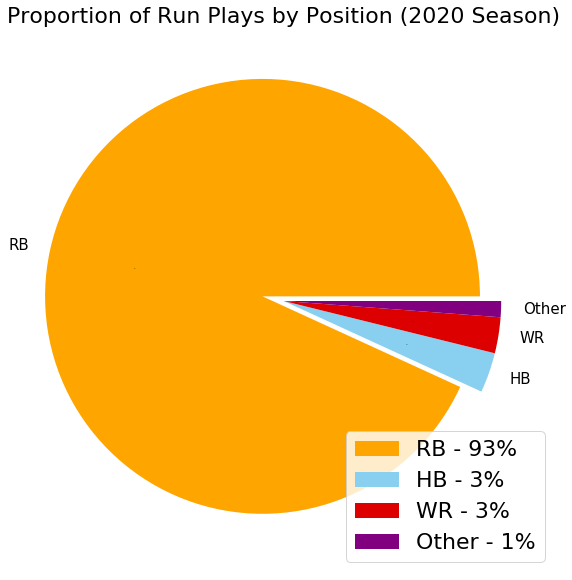

In [16]:
# Creating a pie chart to demonstrate the positions that are most responsible for the run game 

# lists of all the player positions that ran with the ball and the number of times each position did so
rushing_positions = list(df.loc[(df['IsRusher'] == "YES")]['Position'].value_counts().keys())
num_of_runplays = list(df.loc[(df['IsRusher'] == "YES")]['Position'].value_counts())
pos_num = list(zip(rushing_positions, num_of_runplays))

# adding the positions that were responsible for less than 800 of the total runs in the dataset to an 'other' category
sum_list = []
for pos, num in pos_num:
    if num < 800:
        sum_list.append(num)
        num_of_runplays.remove(num)
        rushing_positions.remove(pos)
    else:
        pass
    
rushing_positions.append("Other")
num_of_runplays.append(sum(sum_list))


# plotting the pie chart
fig = plt.figure(figsize=(10,10))
colours = ['#ffa500', '#89cff0', '#DD0000', '#800080']
explode = (0.1, 0, 0, 0)

patches, texts, autotexts = plt.pie(num_of_runplays, labels=rushing_positions, colors=colours,
                                    explode=explode, autopct='%1.0f%%')

# setting the font size of the labels on the pie chart itself
for text in texts:
    text.set_fontsize(15)

# removing the percentage labels from the pie chart itself 
for autotext in autotexts:
    autotext.set_fontsize(0)
    
# creating a list of labels for the legend that will state "the groups label - the percentage of it's proportion"    
perc_list = []
for autotext in autotexts:
    perc_list.append(str(autotext)[-5:-2].strip(" '' "))
    
labels_perc = zip(rushing_positions, perc_list)
legend_labels = []
for pair in labels_perc:
    legend_labels.append(pair[0] + " - " + pair[1])
        
# final aesthetic settings
plt.title("Proportion of Run Plays by Position (2020 Season)", fontsize=22)    
plt.legend(loc=4, fontsize=22, labels=legend_labels)   
plt.show;

#### Visualisation Analysis:
We can see here that almost all of the runs in the dataset are by the Running Backs on the offense, contributing to 93% of the total run plays. It could be argued that this should be rounded to 96% as the HB (Half Back) position is a specific type of running back. <br>

This to be expected as running with the ball (as the name suggests) is the RB's primary role on the team. Because of this the modelling of the data will be based on the cases where it is the RB who is running with the ball and any other player who ran with the ball will be treated as an edge case.
<br> <br>

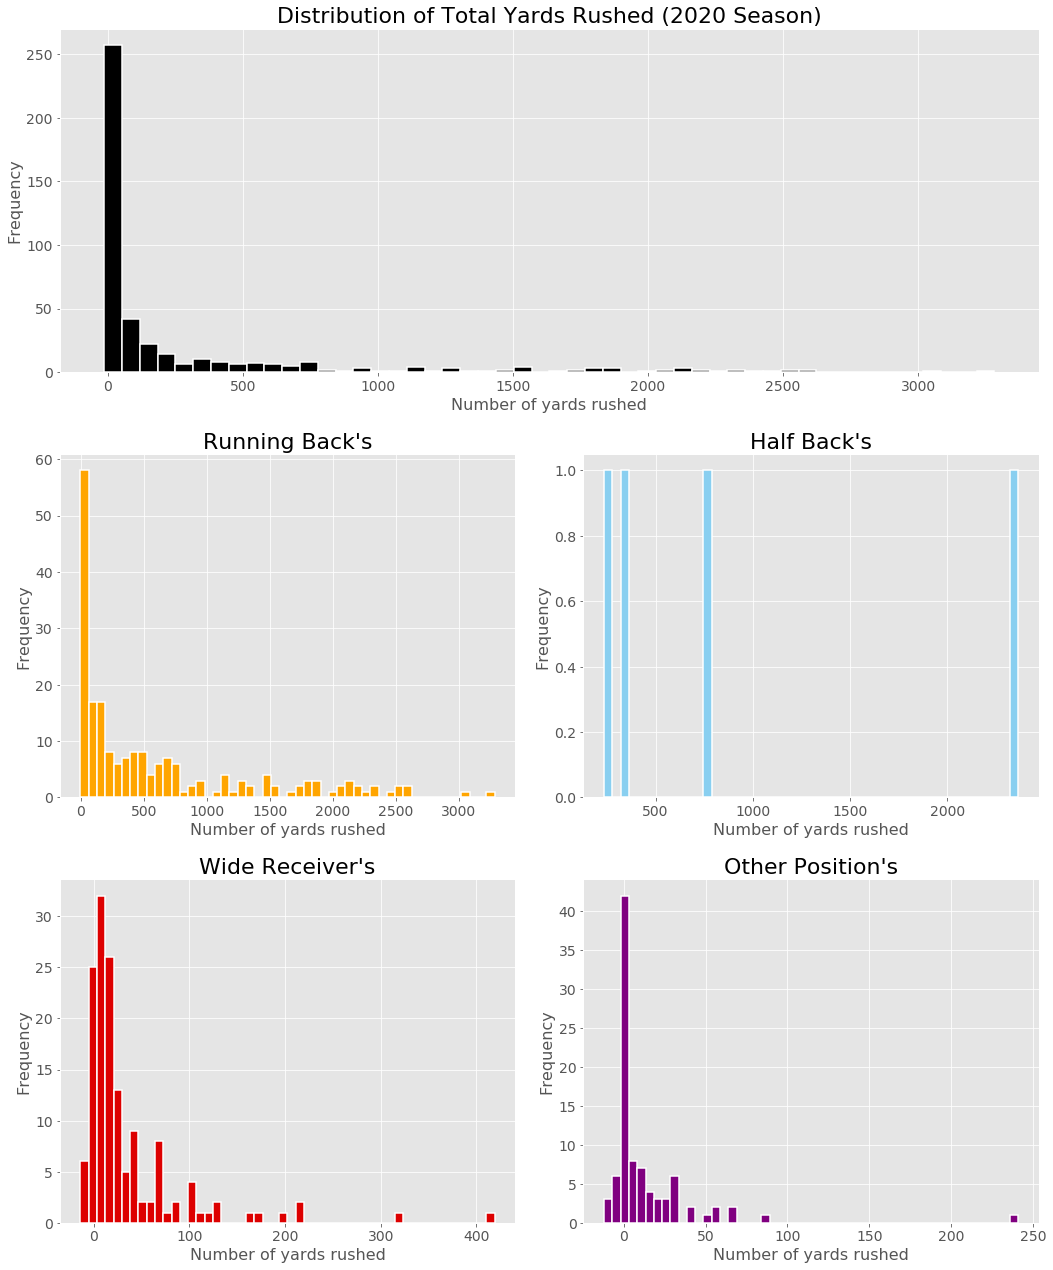

In [17]:
# Asthetic values for the figure
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,18))
title_size = 22
label_size = 16
tick_size = 14



# total distribution of run plays in the dataset
all_rushers_df = df.loc[df['IsRusher'] == "YES"]
all_rushers_total = all_rushers_df.groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2, (1,2))
plt.title('Distribution of Total Yards Rushed (2020 Season)', fontsize=title_size)
plt.xlabel('Number of yards rushed', fontsize=label_size)
plt.ylabel('Frequency', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.hist(all_rushers_total, bins=50, color='black', edgecolor='white', linewidth=1.5)

        
        
# running back distribution
rb_df = df.loc[(df['IsRusher'] == "YES") & (df['Position'] == "RB")]
rb_total = rb_df.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,3)
plt.title('Running Back\'s', fontsize=title_size)
plt.xlabel('Number of yards rushed', fontsize=label_size)
plt.ylabel('Frequency', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.hist(rb_total, bins=50, color='#ffa500', edgecolor='white', linewidth=1.5)



# Half back distribution
hb_df = df.loc[(df['IsRusher'] == "YES") & (df['Position'] == "HB")]
hb_total = hb_df.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,4)
plt.title('Half Back\'s', fontsize=title_size)
plt.xlabel('Number of yards rushed', fontsize=label_size)
plt.ylabel('Frequency', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.hist(hb_total, bins=50, color='#89cff0', edgecolor='white', linewidth=1.5)



# Wide Receiver distribution
wr_df = df.loc[(df['IsRusher'] == "YES") & (df['Position'] == "WR")]
wr_total = wr_df.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,5)
plt.title('Wide Receiver\'s', fontsize=title_size)
plt.xlabel('Number of yards rushed', fontsize=label_size)
plt.ylabel('Frequency', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.hist(wr_total, bins=50, color='#DD0000', edgecolor='white', linewidth=1.5)



# Other distribution
other_df = df.loc[(df['IsRusher'] == "YES") & ((df['Position'] == "FB")
                                               | (df['Position'] == "QB")
                                               | (df['Position'] == "TE")
                                               | (df['Position'] == "CB")
                                               | (df['Position'] == "DT")
                                               | (df['Position'] == "G")
                                               | (df['Position'] == "DE"))]

other_total = other_df.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,6)
plt.title('Other Position\'s', fontsize=title_size)
plt.xlabel('Number of yards rushed', fontsize=label_size)
plt.ylabel('Frequency', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.hist(other_total, bins=50, color='#800080', edgecolor='white', linewidth=1.5)


plt.tight_layout(pad=2)
plt.show();

#### Visualisation Analysis:
- The distribution of yards gained and lost by player position shows that in ***31/40*** of the cases where there had been a loss of yards, it was a WR (Wide Receiver) who had been running with the ball. Most likely, this is due to a defensive player penetrating a gap and tackling the WR in the backfield during an attempted 'Jet Sweep', 'End-Around' or 'Reverse' play. <br>
See [Windy-City-Gridiron's great article](https://www.windycitygridiron.com/2014/11/5/7132567/football-101-difference-between-a-jet-sweep-an-end-around-reverse) on this for an in-depth explanation on these three plays
- The distribution of Half Back's total season yards shows that there are only 4 players in the HB position. Even with this it is interesting to note that between these 4 players there are still 3,722 total yards gained in the season. compared to the WR's where there are 146 players who totalled 5,055 yards. On average each HB ran for ***943 yards*** that season and each WR ran for ***35 yards***.
<br> <br>

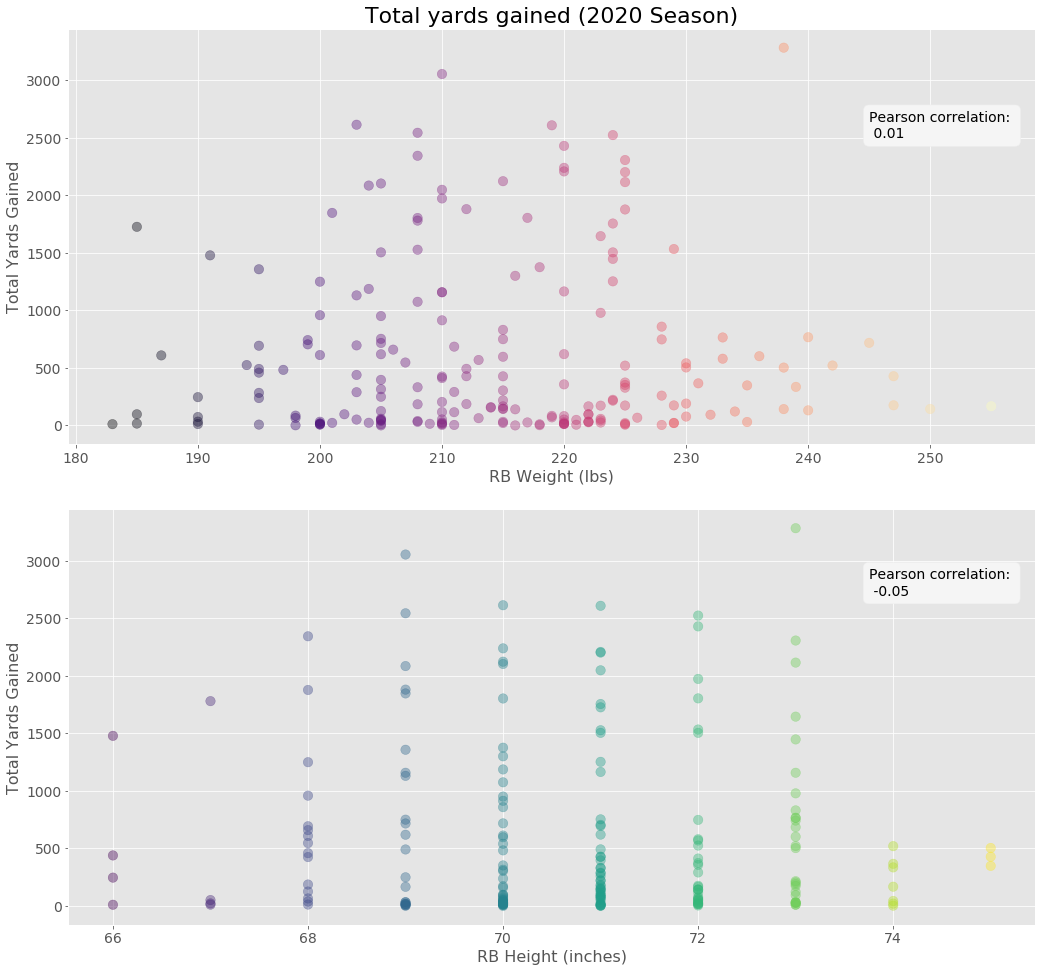

In [18]:
# plot a scatter plot of RB weight vs. yards, and RB height vs. yards
fig = plt.figure(figsize=(15,14))
plt.style.use('ggplot')

rb_weights = [player[1] for player in get_player_weight(rb_df)]
rb_heights = [player[1] for player in get_player_height(rb_df)]
rb_yards = rb_df.groupby('NflId').sum()['Yards']

coef1 = np.corrcoef(rb_weights, rb_yards)[0][1] # pearson correlation coef for RB weights vs. Total yards
coef2 = np.corrcoef(rb_heights, rb_yards)[0][1] # pearson correlation coef for RB heights vs. Total yards

# the text bubbles at the top right corners of each plot
bubble1 = f"Pearson correlation: \n {round(coef1, 2)}"
bubble2 = f"Pearson correlation: \n {round(coef2, 2)}"

# scatter plot of RB weight and yards
fig.add_subplot(2,1,1)
plt.title('Total yards gained *(2020 Season)*', fontsize=title_size)
plt.xlabel('RB Weight (lbs)', fontsize=label_size)
plt.ylabel('Total Yards Gained', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.scatter(rb_weights, rb_yards, c=rb_weights, cmap=plt.get_cmap('magma'), alpha=0.4, s=90)
plt.text(x=245, y=2500, s=bubble1, fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))


# scatter plot of RB height and yards
fig.add_subplot(2,1,2)
plt.xlabel('RB Height (inches)', fontsize=label_size)
plt.ylabel('Total Yards Gained', fontsize=label_size)
plt.scatter(rb_heights, rb_yards, c=rb_heights, cmap=plt.get_cmap('viridis'), alpha=0.4, s=90)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.text(x=73.75, y=2700, s=bubble2, fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))



plt.tight_layout(pad=2.5)
plt.show;

#### Visualisation Analysis:
- The correlation between RB height and RB weight are both very low
- Interestingly the correlation between RB weight and the total yards that running back will run for that season is a postive one up until 225 lbs (100kg). This is to say that a heavier RB has a positive correlation with the total yards he will run for until the RB gets any heavier than 100kg where we can now expect the added weight to have detrimental effects in his performance. Another explanation for this lies in that the RB position is commonly split into two roles: HB (Half Back) and FB (Full Back). The HB will usually be responsible for running with the ball and the screening process for this position greatly emphasises speed. Conversely, the FB's are the heavier set counter parts to the HB and due to their role in blocking for the HB's and QB, are usually heavier than the HB's. For this reason I beleive it would be more accurate to have the RB position split into the two roles. On the other hand it could be argued that this is not very feasible as they will often share or interchange responsibilities and the dermarcation between their roles may not always be so clear cut.
- The relationshipo between the categories of height and total season yards share a similar shape as the weight. It is interesting to note that for both of the distributions, most of the players achieved less than 500 yards in the 2020 season and falling withing the ideal weight or height doesn't necessarily make much of a difference. A boxplot of each height category will be a better visualisation to infer meaning from this distribution. 

<br> <br> 

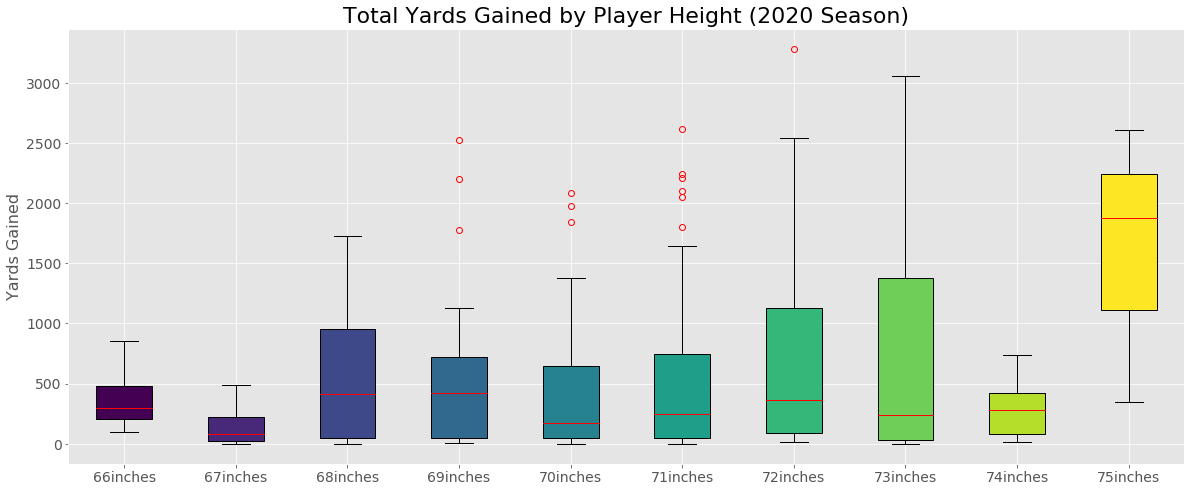

In [91]:
# boxplot graph that more accurately shows the relationship between a RB's height and the total yards gained in a season 
plt.figure(figsize=(20,8))

# the total yards gained in the 2020 season by each running back. seperated by height category
height_66 = rb_df.loc[rb_df['PlayerHeight'] == 66].groupby('NflId').sum()['Yards']
height_67 = rb_df.loc[rb_df['PlayerHeight'] == 67].groupby('NflId').sum()['Yards']
height_68 = rb_df.loc[rb_df['PlayerHeight'] == 68].groupby('NflId').sum()['Yards']
height_69 = rb_df.loc[rb_df['PlayerHeight'] == 69].groupby('NflId').sum()['Yards']
height_70 = rb_df.loc[rb_df['PlayerHeight'] == 70].groupby('NflId').sum()['Yards']
height_71 = rb_df.loc[rb_df['PlayerHeight'] == 71].groupby('NflId').sum()['Yards']
height_72 = rb_df.loc[rb_df['PlayerHeight'] == 72].groupby('NflId').sum()['Yards']
height_73 = rb_df.loc[rb_df['PlayerHeight'] == 73].groupby('NflId').sum()['Yards']
height_74 = rb_df.loc[rb_df['PlayerHeight'] == 74].groupby('NflId').sum()['Yards']
height_75 = rb_df.loc[rb_df['PlayerHeight'] == 75].groupby('NflId').sum()['Yards']

# adding the catefories of data and their labels into lists so they can be used in the plt.boxplot() function
heights = [height_66, height_67, height_68, height_69, height_70, height_71, 
           height_72, height_73, height_74, height_75]
height_labels = ['66inches', '67inches', '68inches', '69inches', '70inches', 
                 '71inches', '72inches', '73inches', '74inches', '75inches']

# aesthetic plot settings
plt.title('Total Yards Gained by Player Height (2020 Season)', fontsize=title_size)
plt.ylabel('Yards Gained', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
height_bplot = plt.boxplot(heights, 
                           labels=height_labels, 
                           flierprops={'markeredgecolor':'red'}, 
                           medianprops={'color':'red'},
                           patch_artist=True)

# setting a colour range based on the increasing height
viridis_cmap = cm.ScalarMappable(cmap='viridis')
height_range = range(66,76)
height_bplot_colours = viridis_cmap.to_rgba(height_range)

for patch, colour in zip(height_bplot['boxes'], height_bplot_colours):
    patch.set_facecolor(colour)
    
plt.savefig("references/images/bplots_height_yards.png")
plt.show();

#### Visualisation Analysis:
Surprisingly the median number of yards ran for by each of the Running Backs in each height category is largely identical; with all of them ranging from 100 to 400 yards in the season. What is also interesting to note, is how the range in the categories increases with the height of the player. As if to say that most Running Backs will run for around 300 yards regardless of their height, but a few Running Backs will have great seasons rushing for over 2,000 yards. Unless they are under 69 inches, in which case they will have close to no chance of rushing for more than 1,500 yards. <br>
With all of this it should also be taken into consideration that the categories below 68 inches and above 73 inches are largely under represented in comparison. This could cause them to be less reliable examples of the expected performance of players in that height category.

<br> <br>

In [21]:
# creating a new df that will contain each individual play's: unique id, down, distance from 1st down, the RB height, the RB weight, yards gained
# I will be timing this block of code as it is taking a while to compile

start_time = process_time() # stopwatch timer started

individual_plays_df = get_individual_plays(rb_df)

stop_time = process_time() # stopwatch timer ended



# print of the total time it took to run the code in minutes and seconds
total_min = np.floor((stop_time-start_time)/ 60) # number of minutes it took to run
remain_sec = np.round((stop_time-start_time)% 60) # number of remaining seconds

print(f'Time to run: {int(total_min)} mins {int(remain_sec)} secs')

Time to run: 246 mins 46 secs


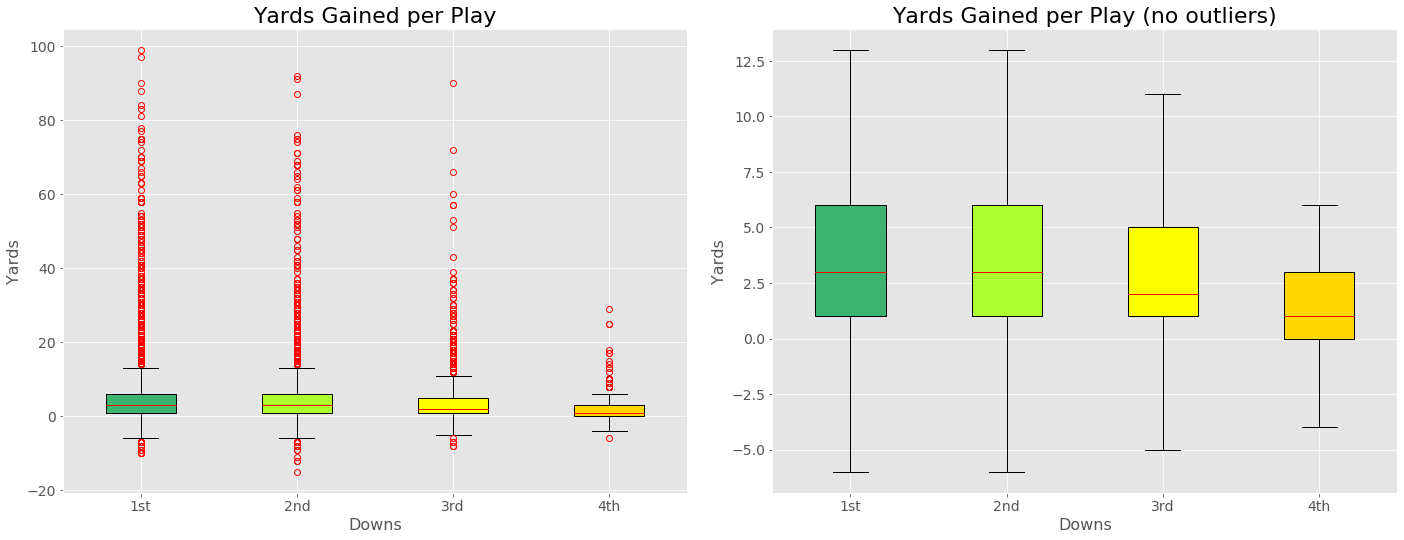

In [24]:
# box plots of each down and the spread of the yards gained in them
fig = plt.figure(figsize=(20,8))

# the total yards gained in every play. seperated by the downs category
first_down = individual_plays_df[individual_plays_df['Down'] == 1]['Yards']
second_down = individual_plays_df[individual_plays_df['Down'] == 2]['Yards']
third_down = individual_plays_df[individual_plays_df['Down'] == 3]['Yards']
fourth_down = individual_plays_df[individual_plays_df['Down'] == 4]['Yards']
all_downs = [first_down, second_down, third_down, fourth_down]
downs_labels = ['1st', '2nd', '3rd', '4th']
down_colours = ['mediumseagreen', 'greenyellow', 'yellow', 'gold']

# first box plot of the data
fig.add_subplot(1,2,1)
plt.title('Yards Gained per Play', fontsize=title_size)
plt.xlabel('Downs', fontsize=label_size)
plt.ylabel('Yards', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
downs_bplot = plt.boxplot(all_downs, 
                          labels=downs_labels,
                          flierprops={'markeredgecolor':'red'}, 
                          medianprops={'color':'red'},
                          patch_artist=True)

for patch, colour in zip(downs_bplot['boxes'], down_colours):
    patch.set_facecolor(colour)
    
    
# second boxplot of the data will disclude the outliers. This should make it easier to see the distribution of data
fig.add_subplot(1,2,2)
plt.title('Yards Gained per Play (no outliers)', fontsize=title_size)
plt.xlabel('Downs', fontsize=label_size)
plt.ylabel('Yards', fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
downs_bplot2 = plt.boxplot(all_downs, 
                           labels=downs_labels, 
                           flierprops={'markeredgecolor':'red'}, 
                           medianprops={'color':'red'},
                           patch_artist=True,
                           showfliers=False)

for patch, colour in zip(downs_bplot2['boxes'], down_colours):
    patch.set_facecolor(colour)

    
plt.tight_layout(pad=2.5)
plt.show();

#### Visualisation Analysis:
We can see that the median yards rushed for per play decreases gradually from 1st down to 4th down, with the biggest fall occuring between 3rd and 4th down. However, 1st and 2nd down are around the same. In addition to this, the range of the yards gained is also much smaller in a 4th down situation. I beleive the differences in 4th down compared to all the other downs can largely be explained by the offensive formations used in these situations with fewer yards being gained or lossed at the tails of the distribution. For example, if an offence where to run out of formations with the QB under Center and the ball into the A gap - like an inside run from a Shotgun formation for instance, then chances are break out runs where the RB gets to the second layer of the defence are less likely to happen. At the same time, runs that are stopped in the backfield for a loss of yards are also less likely.
<br> <br>

## Modelling

In [27]:
# seperating the dependent variable from the independent variables
independent = individual_plays_df.drop('Yards', axis=1)
dependent = individual_plays_df['Yards']

In [28]:
# adding a constant to the independent data
independent = sm.add_constant(independent)

In [89]:
# splitting the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=42)

# splitting the training data into a train and validation set
X_trainfold, X_val, y_trainfold, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Model 1 *(Baseline Model)*

In [82]:
# instantiating the model
base_model = LinearRegression()

# training the model
base_model.fit(X_trainfold, y_trainfold)

# printing the models overall performance (R squared) on the training and validation data
base_train_r2 = round(base_model.score(X_trainfold, y_trainfold), 4)
base_val_r2 = round(base_model.score(X_val, y_val), 4)

print(f"Training data R\N{SUPERSCRIPT TWO}: {base_train_r2}", "\n",  
      f"Validation data R\N{SUPERSCRIPT TWO}: {base_val_r2}",)

Training data R²: 0.0058 
 Validation data R²: 0.0049


#### Model 1 Analysis:
The $R^2$ value for both the training set and the validation set are very low at ***0.0058*** and ***0.0049*** respectively. My reasoning for this can be seen in the conclusion section below. <br>
Besides this there is a very slight drop in the models performance moving from the training set to the validation set. This is to be expected and were the $R^2$ values higher it would be a good sign that the model is generalising well.
<br> <br> <br> <br>

### Model 2 *(Ridge Regression)*

In [85]:
# instantiating the model
ridge_model = Ridge()

# training the model
ridge_model.fit(X_trainfold, y_trainfold)

# printing the models overall performance (R squared) on the training and validation data
ridge_train_r2 = round(ridge_model.score(X_trainfold, y_trainfold), 4)
ridge_val_r2 = round(ridge_model.score(X_val, y_val), 4)

print(f"Training data R\N{SUPERSCRIPT TWO}: {ridge_train_r2}", "\n",  
      f"Validation data R\N{SUPERSCRIPT TWO}: {ridge_val_r2}",)

Training data R²: 0.0058 
 Validation data R²: 0.0049


#### Model 2 Analysis:
The $R^2$ value for both the training set and the validation set are identical to the previous model iteration (when rounded to 4 decimal places) at ***0.0058*** and ***0.0049*** respectively. Again, my reasoning for these low values can be seen in the conclusion section below. <br>
It also comes at no surprise that the implementaion of ridge regularisation has not had a positive effect on the performance of the model. This is because ridge regression will add a penalty term to the linear equation (i.e the model itself) that will 'deter' the model from describing the relationship between the features and the output as too strong of a correlation. What constitutes as "too strong" will largely depend on the values set for $lambda$ in the penalty term. Features with larger coefficients will be penalised more aggresively in order to produce a model that generalises more effectively. Thus, this is not applicable here with such low coefficients anyway
<br> <br> <br> <br>

### Model 3 *(Lasso Regression)*

In [86]:
# instantiating the model
lasso_model = Lasso()

# training the model
lasso_model.fit(X_trainfold, y_trainfold)

# printing the models overall performance (R squared) on the training and validation data
lasso_train_r2 = round(lasso_model.score(X_trainfold, y_trainfold), 4)
lasso_val_r2 = round(lasso_model.score(X_val, y_val), 4)

print(f"Training data R\N{SUPERSCRIPT TWO}: {lasso_train_r2}", "\n",  
      f"Validation data R\N{SUPERSCRIPT TWO}: {lasso_val_r2}",)

Training data R²: 0.0039 
 Validation data R²: 0.0038


#### Model 3 Analysis:
The $R^2$ value for both the training set and the validation set are again very low at ***0.0039*** and ***0.0038*** respectively. <br>
Unexpectedly, the model's performance has dropped in comparison to the ridge regression model, but at the same time comparisons between ridge and lasso regression when it can be argued that linear regression as a whole is not applicable here, are misplaced.
<br><br>

#### Final Model Selection:
The performance of all the models are unsatisfactory, but the performance of the baseline model and the ridge regression model are tied for the best performances. Because the difference between the two is in the implementation of a penalty term (the ridge regression model) and as a result a decreased tendency towards high varioation in performance; I have deemed it not neccesary to use ridge regression at all seeing as both models are massively underfit. In addition, ridge regression is also effective in circumventing the predictive variance that can be caused by small datasets. This is also not necessary as the dataset used is not particularly small with just under 30,000 observations. For these reasons the baseline model is my choice of the three. 


In [96]:
# Testing the final model's performance with the test data

# printing the models overall performance (R squared) on the training and validation data
base_test_r2 = round(base_model.score(X_test, y_test), 4)

print(f"The final model's performance is R\N{SUPERSCRIPT TWO}: {base_test_r2}  \n \n \n")

The final model's performance is R²: 0.0055  
 
 



## Conclusion

None of iterations of the linear regression model have shown to have a good level of performane with all of them explaining less than ***1%*** of the variation in both the training data and the validation data. This is largely due to the fact that a linear regression model is based on four fundamental assumptions: 
1. Linear relationship between the independent and dependent variables
2. No multicolinearity between the independent variables
3. Homoscedasticity of the error
4. Normal distribution of error 
<br>

As the earlier EDA has shown, the relationships between the features used and the ouput of the model are not linear nor are the errors homoscedastic in nature. <br>

Also, in each of the iterations a different regularisation method had been used. Considering that regularisation is a means to increase a model's bias in the hopes of avoiding high variation in the model's out of sample predictive performance; none of the regularisation methods above will improve the model's performance since it's predictive power is so low anyway i.e there are very slim chances that the issue is an over-fitting problem, due to the fact the model doesn't explain the training data at all! Let alone explain it too accurately. <br>
Because of this, a non-linear model such as a decision tree regressor, random forest model or artificial neural net is likely to have a much better predicting the yards gained on each play.

> see this [article](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1) from Towards Data Science for more literature on the assumptions of linear regression

## Future Improvements

As far as the exploratory analysis is concerned, there is much much more to explore! With the dataset having 48 features, the relationships between these features could give more insight into the trends and patterns in the data. As an example, I would like to use the "Week" feature in the dataset and run some time series analysis to uncover some temporal trends in the data. <br>
As far as the modelling process is concerned: firstly,  I will like to see if there are any features in the data that do meet the requirments of linear regression so that I can gain a true sense of the models effectiveness. Secondly, I will like to utilise other non-linear models such as a decision tree regressor or an artificial neural net.